In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import log_loss, accuracy_score

# Reaing the data from csv file 
file_path = 'data.csv'
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()


,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
0,2,21,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
1,23,0,0.0,0.044,0.0,0.0,0.0,0.306179,0.0,0.0,0.0,1,0.0
2,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
3,5,18,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1,0.0
4,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0


#### Descriptive Analysis

In [2]:
df.describe()

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
count,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,1.476360e+05
mean,7.722107,15.220908,0.253245,0.027062,0.050789,0.021648,0.071709,0.271927,0.493587,0.045045,0.013474,0.298586,5.334049e+02
std,7.574278,7.596921,0.366280,0.335509,0.373370,0.298285,1.135755,2.432425,0.763389,0.182274,0.100973,0.457639,8.774011e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,10.000000,0.001084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.820820e-01
50%,4.000000,19.000000,0.033354,0.000000,0.000000,0.000000,0.000000,0.000000,0.097875,0.000000,0.000000,0.000000,1.183562e+01
75%,13.000000,21.000000,0.394372,0.000000,0.000000,0.000000,0.000000,0.061840,0.880929,0.000000,0.000000,1.000000,1.069840e+02
max,23.000000,22.000000,1.000000,79.837480,51.944780,61.556900,209.021870,399.606420,5.000000,1.000000,1.000000,1.000000,1.703186e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147636 entries, 0 to 147635
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NotCount  147636 non-null  int64  
 1   YesCount  147636 non-null  int64  
 2   ATPM      147636 non-null  float64
 3   PFD       147636 non-null  float64
 4   PFG       147636 non-null  float64
 5   SFD       147636 non-null  float64
 6   SFG       147636 non-null  float64
 7   WP        147636 non-null  float64
 8   WS        147636 non-null  float64
 9   AH        147636 non-null  float64
 10  AN        147636 non-null  float64
 11  Status    147636 non-null  int64  
 12  FNC       147636 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 14.6 MB


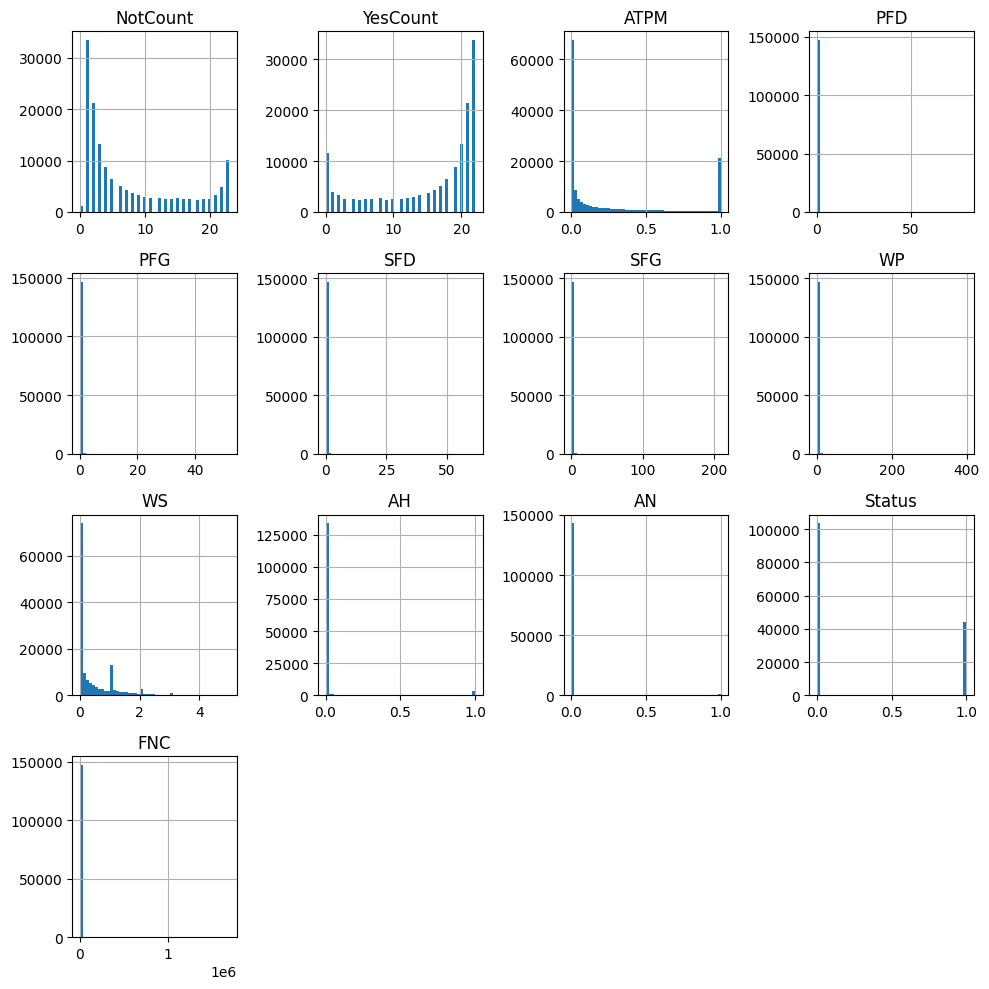

In [4]:
# Plot histograms for all numeric columns
df.hist(figsize=(10, 10), bins=50)
plt.tight_layout()  

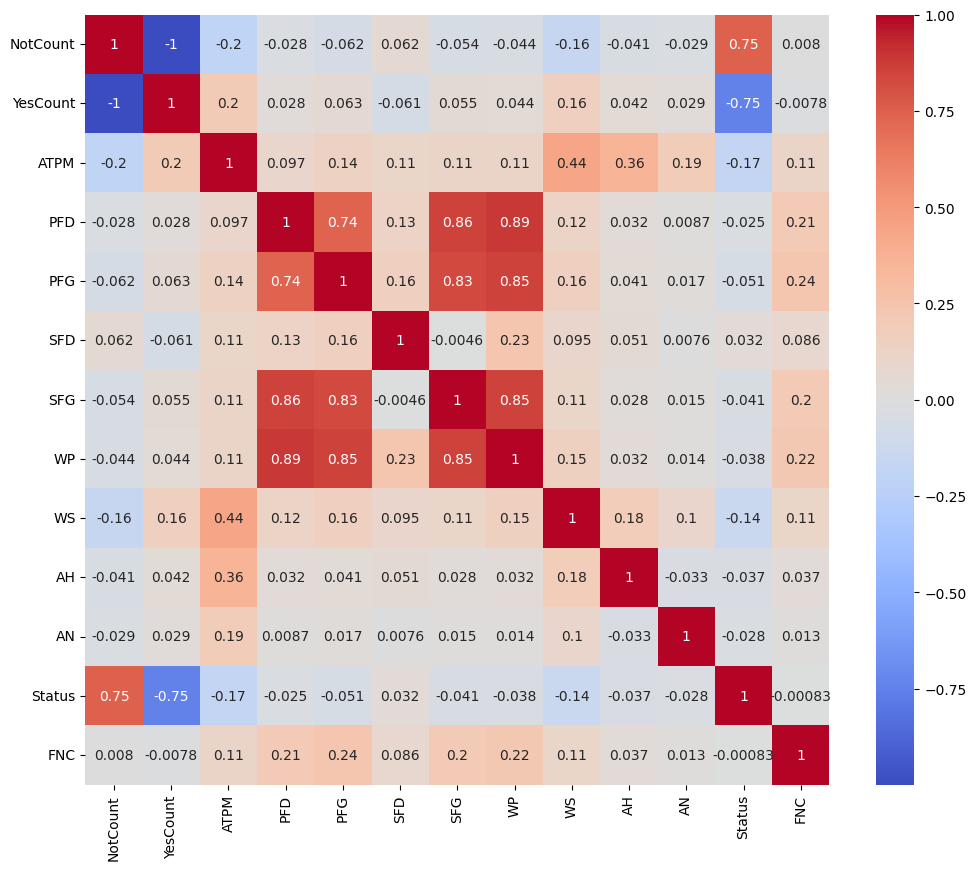

In [5]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


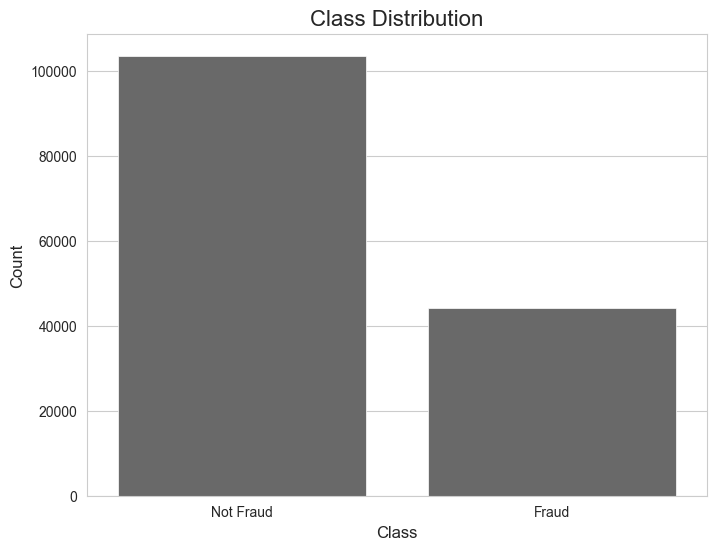

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Count the number of instances in each class
class_counts = df['Status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, color='dimgray', saturation=0.75, linewidth=0.5)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution', fontsize=16)
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], fontsize=10)
plt.show()


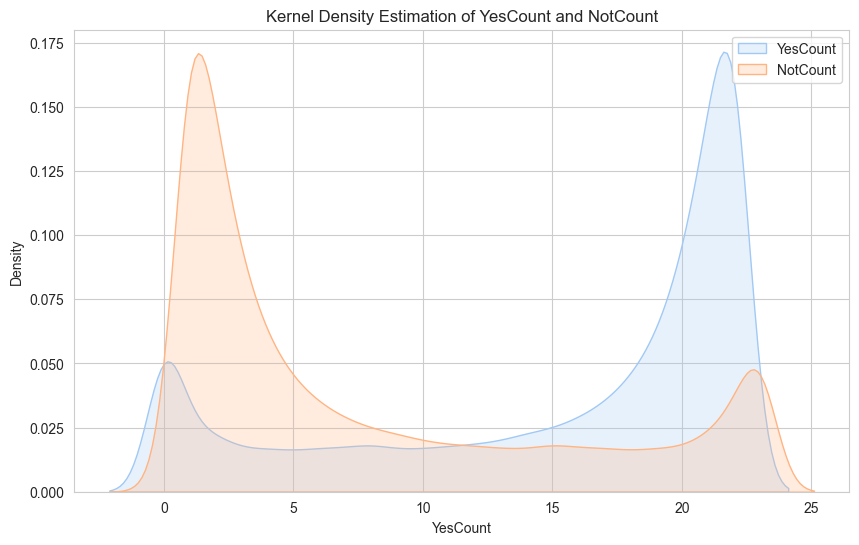

In [7]:
import seaborn as sns

sns.set_palette('pastel')

# Create a KDE plot for 'YesCount'
plt.figure(figsize=(10, 6))
g = sns.kdeplot(data=df, x='YesCount', fill=True)
sns.kdeplot(data=df, x='NotCount', fill=True)
plt.title('Kernel Density Estimation of YesCount and NotCount')
g = g.legend(['YesCount','NotCount'])
plt.show()



#### Nural Network classifier using binary crossentropy loss for comparison 

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Prepare the data
X = df.iloc[:, 0:11].values  # Independent variables (Columns A to K)
y = df.iloc[:, 11].values  # Dependent variable (Column L)
costs = df.iloc[:, 12].values  # False negative cost (Column M)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
costs = torch.tensor(costs, dtype=torch.float32).view(-1, 1)

# Define the constant costs
CFP = CTP = torch.tensor([6.0])  # True Positive and False Positive cost
CTN = torch.tensor([0.0])  # True Negative cost

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test, costs_train, costs_test = train_test_split(X, y, costs, test_size=0.1, random_state=42)
# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        return torch.sigmoid(self.layer2(x))


# Define the model
model = LogisticRegression(X_train.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):  # Number of epochs
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss for every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{100}, Loss: {loss.item()}')



Epoch 10/100, Loss: 0.32369133830070496
Epoch 20/100, Loss: 0.31839194893836975
Epoch 30/100, Loss: 0.31580299139022827
Epoch 40/100, Loss: 0.3144230544567108
Epoch 50/100, Loss: 0.3132597804069519
Epoch 60/100, Loss: 0.3122474253177643
Epoch 70/100, Loss: 0.31134673953056335
Epoch 80/100, Loss: 0.3105408847332001
Epoch 90/100, Loss: 0.30981266498565674
Epoch 100/100, Loss: 0.3091721832752228


In [11]:
model.eval()  
with torch.no_grad():  
    outputs = model(X_test)
    predicted = (outputs > 0.5).float()
    correct = (predicted == y_test).sum().item()
    accuracy = correct / y_test.shape[0]

print(f'Accuracy on test set: {accuracy * 100}%')

Accuracy on test set: 86.27065835816852%


In [20]:
def cost_function(y, c, CFN, N):
    cost = 0
    for i in range(N):
        cost += y[i] * (c[i]*6 + (1 - c[i])*CFN[i]) + (1 - y[i]) * (c[i]*6 + (1 - c[i])*0)
    return cost

cost_function(y_test,predicted,costs_test,y_test.shape[0])

tensor([337088.4688])

### $1^{st} \text{Method: Behnson's method}$

The cost function in Bahnson's method $J_c(\theta)$ refers to the negative logarithm of the likelihood, such that:
$$
J(\theta) = \frac{1}{N} \sum_{i=1}^{N} J_i(\theta),
$$
where the new cost function $J_c(\theta)$ is defined as:
$$
J_c(\theta) = \frac{1}{N} \sum_{i=1}^{N} \left[ y_i(h_\theta(X_i)CT_{Pi} + (1 - h_\theta(X_i))CF_{Ni}) \right. 
\left. + (1 - y_i)(h_\theta(X_i)CF_{Pi} + (1 - h_\theta(X_i))CT_{Ni}) \right].
$$

The cost function $J_c(\theta)$ in our problem is non-differentiable and non-convex. Therefore, traditional optimization algorithms like Maximum Likelihood Estimation (MLE) and backpropagation, which rely on gradient information, cannot guarantee finding its global minimum. To overcome this challenge, we resort to a class of optimization algorithms known as Genetic Algorithms (GAs) that are capable of finding global minima in complex search spaces.


In [14]:
from scipy.optimize import differential_evolution
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Prepare the data
X = df.iloc[:, 0:11].values  # Independent variables (Columns A to K)
y = df.iloc[:, 11].values  # Dependent variable (Column L)
CFN = df.iloc[:, 12].values  # False negative cost (Column M)

# Define the constant costs
CFP = CTP = 6.0  # True Positive and False Positive cost
CTN = 0.0  # True Negative cost

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test, CFN_train, CFN_test = train_test_split(X, y, CFN, test_size=0.1, random_state=42)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = X_train
y = y_train

# Define the cost-sensitive loss function
def cost_sensitive_loss(theta):
    h = sigmoid(np.dot(X, theta))
    return np.mean(y * (h * CTP + (1 - h) * CFN_train) + (1 - y) * (h * CFP + (1 - h) * CTN))

# Define the bounds for each parameter
bounds = [(-1000, 1000)] * X.shape[1]

# Use differential evolution to find the optimal theta values
result = differential_evolution(cost_sensitive_loss, bounds)

# The optimal theta values are in result.x
theta_optimal = result.x

y_pred_test = sigmoid(np.dot(X_test, theta_optimal))

In [15]:
# Convert predicted probabilities to class labels by setting threshold as 0.5
threshold = 0.5
y_pred_labels = (y_pred_test > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)

print(f'Accuracy: {accuracy}')


Accuracy: 0.7655784340287185


In [16]:
# Calculate the logistic loss on the test set
test_loss = cost_function(y_test,y_pred_labels,CFN_test,y_test.shape[0])
print(f"Total cost of Test set using Bahnsens Method is: {test_loss}")


50508.05684599997

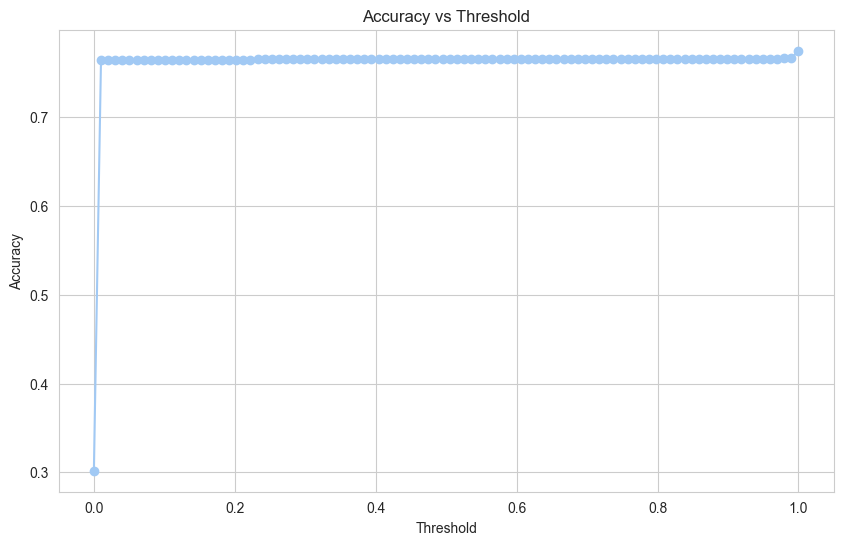

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracies = []
thresholds = np.linspace(0, 1, 100)

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_pred_labels = y_pred_test >= threshold
    accuracy = accuracy_score(y_test, y_pred_labels)
    accuracies.append(accuracy)

# Plot accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### $2^{nd} \text{Method: Nikou Günnemann's Approach}$

The **general framework** of the cost-sensitive logistic regression model according to Nikou Günnemann's is to minimize the loss function $$l(Y, X, \beta)$$ defined as:

$$
l(Y, X, \beta) = \sum_{i=1}^{m} a_i \cdot y_i \cdot (-\log f(g(x_i, \beta))^{b_i}) + a_i \cdot (1 - y_i) \cdot (-\log(1 - f(g(x_i, \beta)))^{b_i})
$$


We are doing here **varient A** according to which $a_i = c_i$ and $b_i = 1$

In [32]:
X_train_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])  # Add intercept
X_test_intercept = np.hstack([np.ones((X_test.shape[0], 1)), X_test])  # Add intercept

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic loss function with log smoothing
def logistic_loss(beta, X, y, costs):
    linear_predictor = np.dot(X, beta)
    probabilities = sigmoid(linear_predictor)
    ep = 1e-10  # Smoothing factor
    return np.mean(costs * (y * -np.log(probabilities ) + (1 - y) * -np.log(1 - probabilities )))

# Define the cost function for differential evolution
def cost_sens_function(beta, *args):
    X, y, costs = args
    return logistic_loss(beta, X, y, costs)

# Prepare the data
bounds = [(-100, 100)] * X_train_intercept.shape[1]
result = differential_evolution(cost_sens_function, bounds, args=(X_train_intercept, y_train, CFN_train))

# Get the best coefficients
beta = result.x

In [33]:
# Make predictions on the test set
linear_predictor_test = np.dot(X_test_intercept, beta)
probabilities_test = sigmoid(linear_predictor_test)

# Convert predicted probabilities to class labels by setting threshold as 0.5
threshold = 0.5
y_pred_labels = probabilities_test >= threshold

# Calculate accuracys 
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.3031021403413709


In [34]:
# Calculate the logistic loss on the test set
test_loss = cost_function(y_test,y_pred_labels,CFN_test,y_test.shape[0])
print(f"Total cost of Test set using Nikou Günnemann's method: {test_loss}")


Total cost of Test set using Nikou Günnemann's method: 88458.0


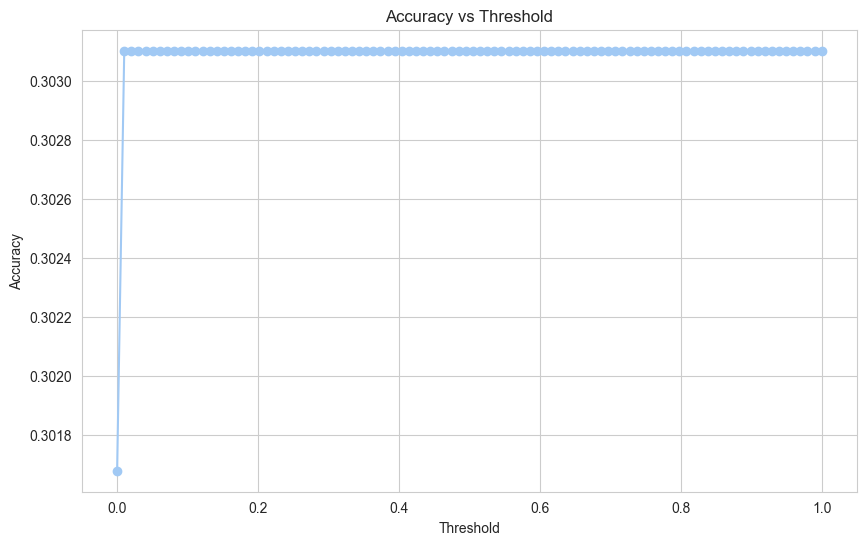

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize a list to store the accuracies
accuracies = []

# Define a range of threshold values
thresholds = np.linspace(0, 1, 100)

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_pred_labels = probabilities_test >= threshold
    accuracy = accuracy_score(y_test, y_pred_labels)
    accuracies.append(accuracy)

# Plot accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
